# Agrupación y filtrado como en SQL

se tiene la siguiente tabla con la información de las tablas 



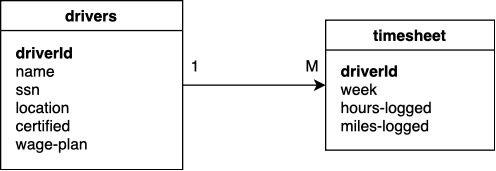

## Inicialización de las tablas


In [17]:
import pandas as pd 

df_drivers = pd.read_csv("dataset/drivers.csv")

display(df_drivers.head(), df_drivers.shape)

,driverId,name,ssn,location,certified,wage-plan
0,10,George Vetticaden,621011971,244-4532 Nulla Rd.,N,miles
1,11,Jamie Engesser,262112338,366-4125 Ac Street,N,miles
2,12,Paul Coddin,198041975,Ap #622-957 Risus. Street,Y,hours
3,13,Joe Niemiec,139907145,2071 Hendrerit. Ave,Y,hours
4,14,Adis Cesir,820812209,Ap #810-1228 In St.,Y,hours


(34, 6)

In [18]:
df_ts = pd.read_csv("dataset/timesheet.csv")

display(df_ts.head(), df_ts.shape)

,driverId,week,hours-logged,miles-logged
0,10,1,70,3300
1,10,2,70,3300
2,10,3,60,2800
3,10,4,70,3100
4,10,5,70,3200


(1768, 4)

## Media de la cantidad de horas y millas de cada conductor por año

In [19]:
mean_timesheet = df_ts.groupby("driverId").mean()

display(mean_timesheet.head(8))

,week,hours-logged,miles-logged
driverId,,,
10,26.5,62.153846,2829.807692
11,26.5,70.038462,3448.076923
12,26.5,50.750000,2614.653846
13,26.5,52.442308,2579.346154
14,26.5,53.480769,2627.384615
15,26.5,52.576923,2668.269231
16,26.5,52.807692,2638.557692
17,26.5,51.942308,2615.230769


Dado que no va a ser útil eliminemos la columna week

In [20]:
mean_timesheet.pop("week")
display(mean_timesheet.head(8))

,hours-logged,miles-logged
driverId,,
10,62.153846,2829.807692
11,70.038462,3448.076923
12,50.750000,2614.653846
13,52.442308,2579.346154
14,53.480769,2627.384615
15,52.576923,2668.269231
16,52.807692,2638.557692
17,51.942308,2615.230769


## Registros con valores por debajo de la media

Primero creamos un dataframe donde tendremos almacenadas la media de horas registradas por cada conductor

In [21]:
mean_hours_logged_by_driver = df_ts.groupby("driverId")["hours-logged"].transform("mean")

display(mean_hours_logged_by_driver.head(18), len(mean_hours_logged_by_driver))

0     62.153846
1     62.153846
2     62.153846
3     62.153846
4     62.153846
5     62.153846
6     62.153846
7     62.153846
8     62.153846
9     62.153846
10    62.153846
11    62.153846
12    62.153846
13    62.153846
14    62.153846
15    62.153846
16    62.153846
17    62.153846
Name: hours-logged, dtype: float64

1768

Luego vamos a agregar el dataframe anterior como una columna a una copia del dataframe de timesheet. 

Como el dataframe de timesheet ya está organizado por driverId, no es necesario organizarlo para agregar la nueva columna agrupada por driverId

In [22]:
timesheet_with_mean = df_ts.copy()
timesheet_with_mean["mean_hours-logged"] = mean_hours_logged_by_driver
timesheet_with_mean.head()

,driverId,week,hours-logged,miles-logged,mean_hours-logged
0,10,1,70,3300,62.153846
1,10,2,70,3300,62.153846
2,10,3,60,2800,62.153846
3,10,4,70,3100,62.153846
4,10,5,70,3200,62.153846


Ahora vamos a hacer un filtrado para mostrar únicamente los registros (filas) donde las horas hechas por el conductor sean menores a la media del mismo conductor

In [23]:
timesheet_below = timesheet_with_mean[
    timesheet_with_mean["hours-logged"] < timesheet_with_mean["mean_hours-logged"]
]
display(timesheet_below.head(), timesheet_below.tail())

,driverId,week,hours-logged,miles-logged,mean_hours-logged
2,10,3,60,2800,62.153846
9,10,10,50,2500,62.153846
19,10,20,30,1200,62.153846
20,10,21,50,2500,62.153846
25,10,26,60,2600,62.153846


,driverId,week,hours-logged,miles-logged,mean_hours-logged
1756,43,41,51,2701,52.884615
1760,43,45,46,2671,52.884615
1762,43,47,50,2572,52.884615
1763,43,48,52,2517,52.884615
1767,43,52,48,2764,52.884615


## Computo de la cantidad de horas y millas registradas por conductor

In [24]:
sum_timesheet = df_ts.groupby("driverId").sum()
#Eliminamos la columna week porque no nos aporta nada
sum_timesheet.pop("week")
sum_timesheet.head(10)

,hours-logged,miles-logged
driverId,,
10,3232,147150
11,3642,179300
12,2639,135962
13,2727,134126
14,2781,136624
15,2734,138750
16,2746,137205
17,2701,135992
18,2654,137834


Usemos aggregate para encontrar el mínimo y máximo de horas registradas por cada conductor

In [25]:
df_ts.groupby("driverId")["hours-logged"].agg(["min", "max"])

,min,max
driverId,,
10,0,76
11,0,92
12,0,60
13,10,60
14,45,60
15,45,60
16,45,60
17,20,60
18,45,60


## Unión de las tablas usando JOIN

Haremos un JOIN entre el dataframe con la información personal de cada conductor y el dataframe con la suma de las horas y millas logeadas de cada conductor, este join se hará basado en la columna driverId

In [26]:
summary = pd.merge(
    sum_timesheet,
    df_drivers[["driverId", "name"]],
    on="driverId"
)

summary

,driverId,hours-logged,miles-logged,name
0,10,3232,147150,George Vetticaden
1,11,3642,179300,Jamie Engesser
2,12,2639,135962,Paul Coddin
3,13,2727,134126,Joe Niemiec
4,14,2781,136624,Adis Cesir
5,15,2734,138750,Rohit Bakshi
6,16,2746,137205,Tom McCuch
7,17,2701,135992,Eric Mizell
8,18,2654,137834,Grant Liu
9,19,2738,137968,Ajay Singh


## Almacenamiento de los resultados

Pasaremos el datrame resultante a un archivo csv para su almacenamiento y posible uso posterior

In [27]:
summary.to_csv(
    "dataset/driversCompleto.csv",
    sep=",",
    header=True, #agregar el header al archivo
    index=False #no agregar el index al archivo
)

#Visualización del contenido del archivo
!head dataset/driversCompleto.csv

driverId,hours-logged,miles-logged,name
10,3232,147150,George Vetticaden
11,3642,179300,Jamie Engesser
12,2639,135962,Paul Coddin
13,2727,134126,Joe Niemiec
14,2781,136624,Adis Cesir
15,2734,138750,Rohit Bakshi
16,2746,137205,Tom McCuch
17,2701,135992,Eric Mizell
18,2654,137834,Grant Liu


## Ordenamiento por la cantidad de millas registradas

In [28]:
top10 = summary.sort_values(by="miles-logged", ascending=False).head(10)
top10

,driverId,hours-logged,miles-logged,name
1,11,3642,179300,Jamie Engesser
0,10,3232,147150,George Vetticaden
23,33,2759,139285,Sridhara Sabbella
15,25,2723,139180,Jean-Philippe Playe
29,39,2745,138788,David Kaiser
5,15,2734,138750,Rohit Bakshi
25,35,2728,138727,Emil Siemes
11,21,2751,138719,Jeff Markham
31,41,2723,138407,Greg Phillips
19,29,2760,138255,Teddy Choi


## Creación de un gráfico de barras horizontales

para esto haremos uso de la libreria matplotlib

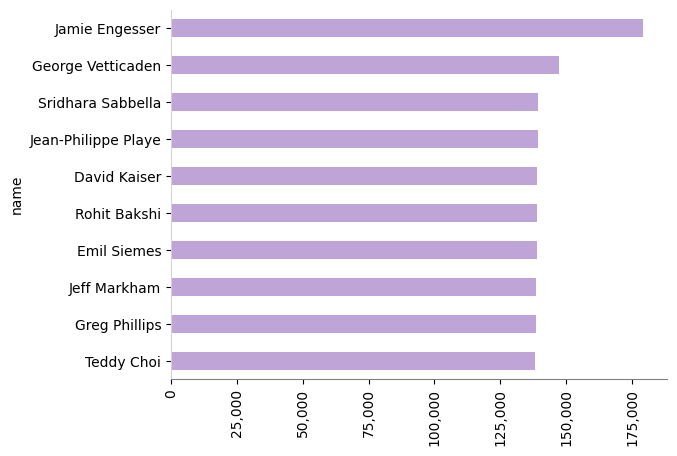

In [ ]:
#importemos lo necesario para los gráficos
import matplotlib
import matplotlib.pyplot as plt
#Hacemos que cada fila sea identificada por el nombre del driver
top10 = top10.set_index("name")

# Paleta de colores:
#
#   tab:blue     tab:red       tab:pink
#   tab:orange   tab:purple    tab:gray
#   tab:green    tab:brown     tab:olive
#   tab:cyan

top10["miles-logged"].plot.barh(color="tab:purple", alpha=0.6)#barh hace referencia a grafico de barras horizontales, alpha es la transparencia del color

plt.gca().invert_yaxis()

#Dandole formato a los unidades de mil 
plt.gca().get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(
        lambda x, p: format(int(x), ",")
    )
)

#rotando los identificadores del eje x
plt.xticks(rotation=90)

#vamos a darle estilo a la caja contenedora del gráfico
plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

## Creación de gráfico de barras verticales

Nuevamente usaremos matplotlib para este gráfico

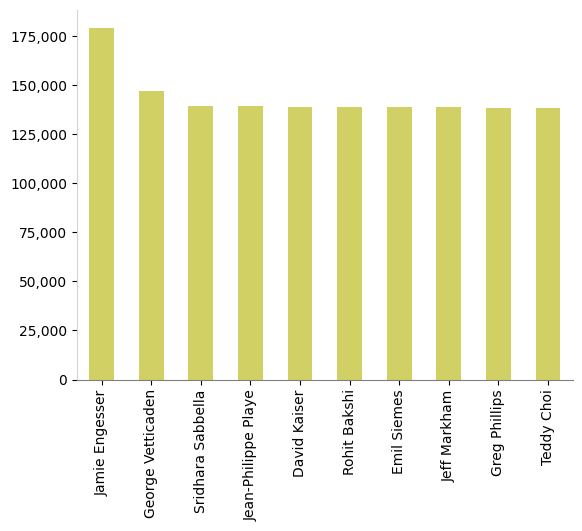

In [ ]:
top10['miles-logged'].plot.bar(color='tab:olive', alpha=0.7)

plt.gca().get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#ELiminamos el label o titulo del eje x para limpiar el gráfico
plt.xlabel("")

plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
